In [1]:
import pandas as pd
df1 = pd.read_csv('described_sugarcane.csv')
rsd = df1.drop(['incidencia_LSD', 'prevalencia_RSD', 'prevalencia_LSD'], axis = 1)
rsd.loc[rsd['incidencia_RSD'] > 0, 'RSD'] = 1
rsd.loc[rsd['incidencia_RSD'] == 0, 'RSD'] = 0

lsd = df1.drop(['incidencia_RSD', 'prevalencia_RSD', 'prevalencia_LSD'], axis = 1)
lsd.loc[lsd['incidencia_LSD'] > 0, 'LSD'] = 1
lsd.loc[lsd['incidencia_LSD'] == 0, 'LSD'] = 0

lsd.drop(['incidencia_LSD','longitude','latitude'],axis=1,inplace=True)
rsd.drop(['incidencia_RSD','longitude','latitude'],axis=1,inplace=True)

rsd = rsd.drop('LSD', axis=1)

In [2]:
len(rsd.columns)

74

In [3]:
numeric= ['area','edad','bdod_0-5cm_mean','bdod_0-5cm_mean',
       'bdod_100-200cm_mean', 'bdod_15-30cm_mean', 'bdod_30-60cm_mean',
       'bdod_5-15cm_mean', 'bdod_60-100cm_mean', 'cec_0-5cm_mean',
       'cec_100-200cm_mean', 'cec_15-30cm_mean', 'cec_30-60cm_mean',
       'cec_5-15cm_mean', 'cec_60-100cm_mean', 'cfvo_0-5cm_mean',
       'cfvo_100-200cm_mean', 'cfvo_15-30cm_mean', 'cfvo_30-60cm_mean',
       'cfvo_5-15cm_mean', 'cfvo_60-100cm_mean', 'clay_0-5cm_mean',
       'clay_100-200cm_mean', 'clay_15-30cm_mean', 'clay_30-60cm_mean',
       'clay_5-15cm_mean', 'clay_60-100cm_mean', 'nitrogen_0-5cm_mean',
       'nitrogen_100-200cm_mean', 'nitrogen_15-30cm_mean',
       'nitrogen_30-60cm_mean', 'nitrogen_5-15cm_mean',
       'nitrogen_60-100cm_mean', 'phh2o_0-5cm_mean', 'phh2o_100-200cm_mean',
       'phh2o_15-30cm_mean', 'phh2o_30-60cm_mean', 'phh2o_5-15cm_mean',
       'phh2o_60-100cm_mean', 'sand_0-5cm_mean', 'sand_100-200cm_mean',
       'sand_15-30cm_mean', 'sand_30-60cm_mean', 'sand_5-15cm_mean',
       'sand_60-100cm_mean', 'silt_0-5cm_mean', 'silt_100-200cm_mean',
       'silt_15-30cm_mean', 'silt_30-60cm_mean', 'silt_5-15cm_mean',
       'silt_60-100cm_mean', 'soc_0-5cm_mean', 'soc_100-200cm_mean',
       'soc_15-30cm_mean', 'soc_30-60cm_mean', 'soc_5-15cm_mean',
       'soc_60-100cm_mean', 'MOD13Q1_006__250m_16_days_NDVI', 'RH2M',
       'PRECTOTCORR', 'WS2M', 'CLRSKY_SFC_PAR_TOT', 'T2M', 'T2M_MAX',
       'T2M_MIN']
categories = ['year', 'month', 'ingenio', 'corte',
       'lote_comercial', 'lote_semillero']
cardinal_data = ['hacienda', 'variedad']
dates = ['Date']

In [4]:
# RSD
dataset = rsd
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (19765, 74)
Unseen Data For Predictions: (1040, 74)


In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'RSD', session_id=123,
                   numeric_features=numeric,categorical_features=categories,
                   high_cardinality_features=cardinal_data, date_features=dates) 

,Description,Value
0,session_id,123
1,Target,RSD
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19765, 74)"
5,Missing Values,False
6,Numeric Features,64
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,True


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9822,0.9899,0.6559,0.8136,0.7246,0.7156,0.7209,0.3440
gbc,Gradient Boosting Classifier,0.9773,0.9627,0.4089,0.9009,0.5602,0.5503,0.5971,3.4650
dt,Decision Tree Classifier,0.9747,0.8240,0.6417,0.6506,0.6443,0.6312,0.6322,0.1410
rf,Random Forest Classifier,0.9674,0.9405,0.2755,0.6012,0.3764,0.3620,0.3921,0.9340
ada,Ada Boost Classifier,0.9673,0.9007,0.1337,0.7311,0.2237,0.2152,0.3007,0.7320
et,Extra Trees Classifier,0.9673,0.9000,0.4109,0.5636,0.4734,0.4570,0.4640,0.5630
lr,Logistic Regression,0.9644,0.7831,0.0020,0.1000,0.0039,0.0038,0.0139,2.1490
ridge,Ridge Classifier,0.9643,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0350
dummy,Dummy Classifier,0.9643,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
knn,K Neighbors Classifier,0.9636,0.7948,0.1175,0.4826,0.1869,0.1751,0.2233,0.2660


# Best model

In [8]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9863,0.9938,0.7347,0.8571,0.7912,0.7842,0.7866
1,0.9841,0.9920,0.6200,0.9118,0.7381,0.7302,0.7447
2,0.9805,0.9887,0.6800,0.7556,0.7158,0.7057,0.7068
3,0.9812,0.9869,0.6800,0.7727,0.7234,0.7137,0.7153
4,0.9819,0.9933,0.6200,0.8378,0.7126,0.7035,0.7120
5,0.9819,0.9880,0.7143,0.7609,0.7368,0.7275,0.7279
6,0.9805,0.9835,0.6327,0.7750,0.6966,0.6866,0.6904
7,0.9805,0.9897,0.6122,0.7895,0.6897,0.6797,0.6856
8,0.9826,0.9897,0.6327,0.8378,0.7209,0.7122,0.7196
9,0.9826,0.9935,0.6327,0.8378,0.7209,0.7122,0.7196


In [12]:
tuned_lightgbm = tune_model(lightgbm, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9783,0.9788,0.4694,0.8519,0.6053,0.5951,0.6232
1,0.9776,0.9844,0.4200,0.9130,0.5753,0.5654,0.6109
2,0.9718,0.9828,0.4400,0.6667,0.5301,0.5162,0.5281
3,0.9725,0.9802,0.4200,0.7000,0.5250,0.5118,0.5296
4,0.9776,0.9826,0.4800,0.8276,0.6076,0.5969,0.6205
5,0.9725,0.9778,0.4694,0.6571,0.5476,0.5339,0.5419
6,0.9740,0.9705,0.4490,0.7097,0.5500,0.5373,0.5523
7,0.9747,0.9746,0.4694,0.7188,0.5679,0.5555,0.5689
8,0.9754,0.9781,0.3878,0.8261,0.5278,0.5168,0.5562
9,0.9783,0.9647,0.5102,0.8065,0.6250,0.6144,0.6315


In [10]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

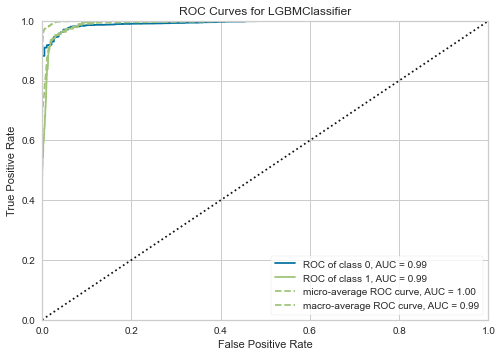

In [14]:
plot_model(lightgbm,plot = 'auc')

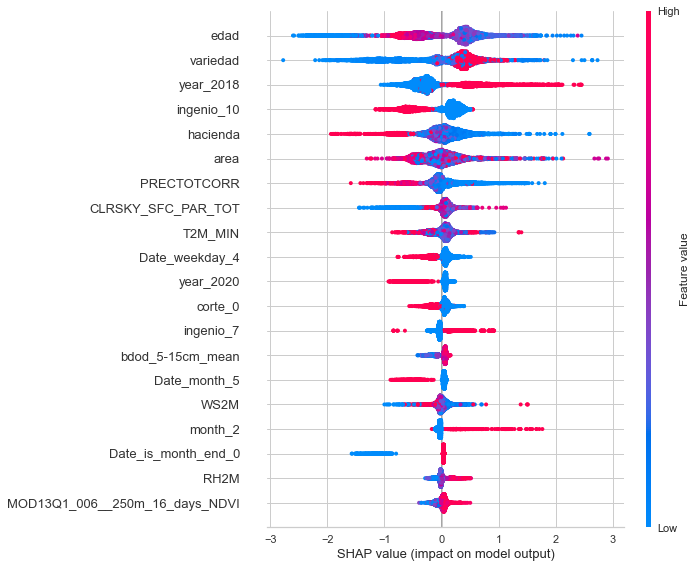

In [15]:
interpret_model(lightgbm)

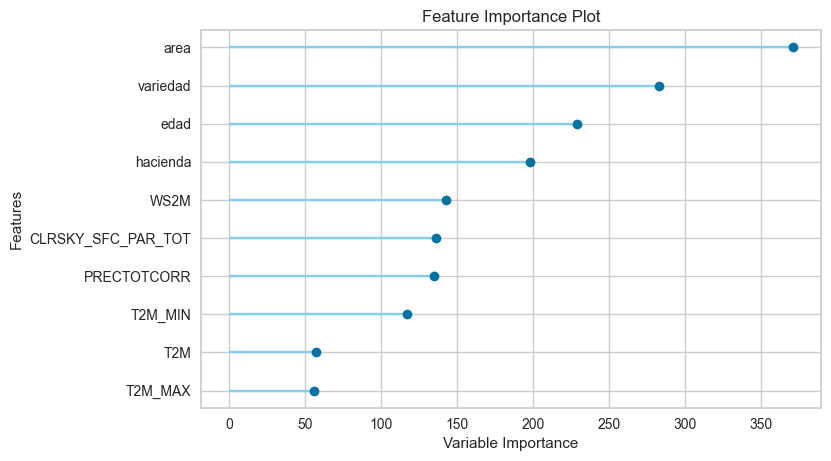

In [16]:
plot_model(lightgbm, 'feature')

In [20]:
predict_model(lightgbm)

ValueError: Number of features of the model must match the input. Model n_features_ is 114 and input n_features is 116

In [ ]:
final_lr = finalize_model(lightgbm)

In [ ]:
#Final Random Forest model parameters for deployment
print(lightgbm)

In [17]:
# LSD
dataset = lsd
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (19765, 75)
Unseen Data For Predictions: (1040, 75)


In [18]:
exp_clf102 = setup(data = data, target = 'LSD', session_id=123,
                   numeric_features=numeric,categorical_features=categories,
                   high_cardinality_features=cardinal_data, date_features=dates) 

,Description,Value
0,session_id,123
1,Target,LSD
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19765, 75)"
5,Missing Values,False
6,Numeric Features,65
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,True


In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9835,0.9920,0.6524,0.8253,0.7270,0.7186,0.7248,0.3630
dt,Decision Tree Classifier,0.9777,0.8271,0.6418,0.6882,0.6606,0.6491,0.6514,0.1450
gbc,Gradient Boosting Classifier,0.9747,0.9578,0.2748,0.9386,0.4193,0.4105,0.4954,3.2500
knn,K Neighbors Classifier,0.9697,0.7864,0.2196,0.6754,0.3288,0.3174,0.3719,0.2770
rf,Random Forest Classifier,0.9662,0.9160,0.2259,0.5082,0.3114,0.2967,0.3233,0.9530
ridge,Ridge Classifier,0.9661,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0540
dummy,Dummy Classifier,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
lr,Logistic Regression,0.9658,0.7963,0.0064,0.2500,0.0124,0.0110,0.0357,1.9100
ada,Ada Boost Classifier,0.9652,0.8849,0.0213,0.3233,0.0396,0.0354,0.0742,0.6930
et,Extra Trees Classifier,0.9644,0.8707,0.3602,0.4744,0.4078,0.3899,0.3947,0.5820


In [21]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9812,0.9950,0.6383,0.7692,0.6977,0.6881,0.6913
1,0.9827,0.9959,0.6383,0.8108,0.7143,0.7055,0.7108
2,0.9790,0.9871,0.5745,0.7500,0.6506,0.6400,0.6460
3,0.9884,0.9943,0.7660,0.8780,0.8182,0.8122,0.8143
4,0.9819,0.9917,0.5745,0.8438,0.6835,0.6746,0.6878
5,0.9819,0.9890,0.6304,0.7838,0.6988,0.6896,0.6939
6,0.9819,0.9943,0.5532,0.8667,0.6753,0.6665,0.6843
7,0.9884,0.9962,0.7660,0.8780,0.8182,0.8122,0.8143
8,0.9826,0.9838,0.6809,0.7805,0.7273,0.7184,0.7201
9,0.9870,0.9925,0.7021,0.8919,0.7857,0.7791,0.7850


In [22]:
tuned_lightgbm = tune_model(lightgbm, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9704,0.8722,0.4894,0.5750,0.5287,0.5135,0.5153
1,0.9711,0.9557,0.4255,0.6061,0.5000,0.4856,0.4937
2,0.9624,0.9309,0.3617,0.4359,0.3953,0.3761,0.3779
3,0.9725,0.9264,0.5532,0.6047,0.5778,0.5636,0.5642
4,0.9711,0.9547,0.3830,0.6207,0.4737,0.4597,0.4739
5,0.9711,0.8904,0.4348,0.5882,0.5000,0.4855,0.4913
6,0.9646,0.9010,0.4681,0.4783,0.4731,0.4548,0.4548
7,0.9747,0.9461,0.4894,0.6765,0.5679,0.5552,0.5629
8,0.9711,0.9333,0.5319,0.5814,0.5556,0.5406,0.5412
9,0.9689,0.8768,0.4468,0.5526,0.4941,0.4783,0.4811


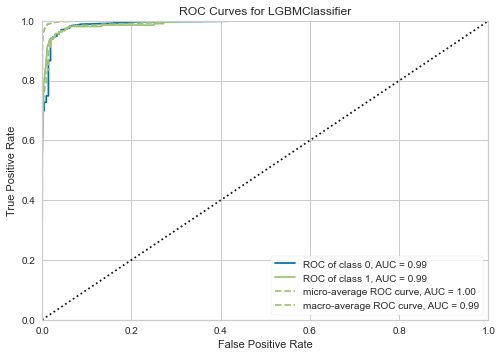

In [23]:
plot_model(lightgbm,plot = 'auc')

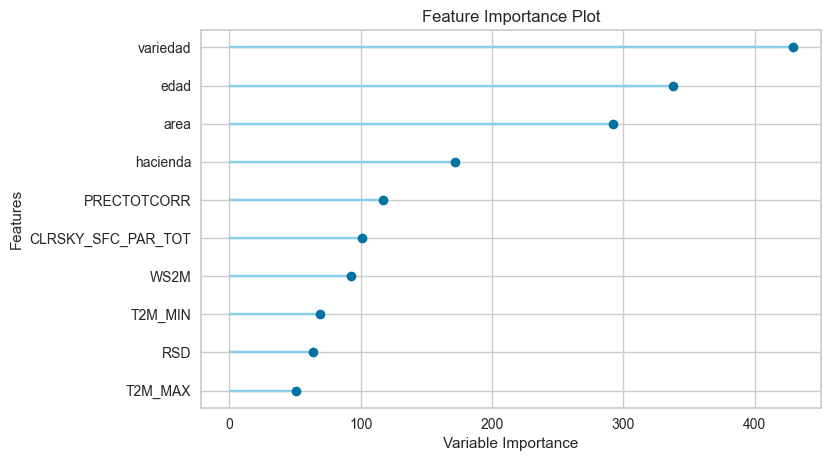

In [25]:
plot_model(lightgbm,plot = 'feature')

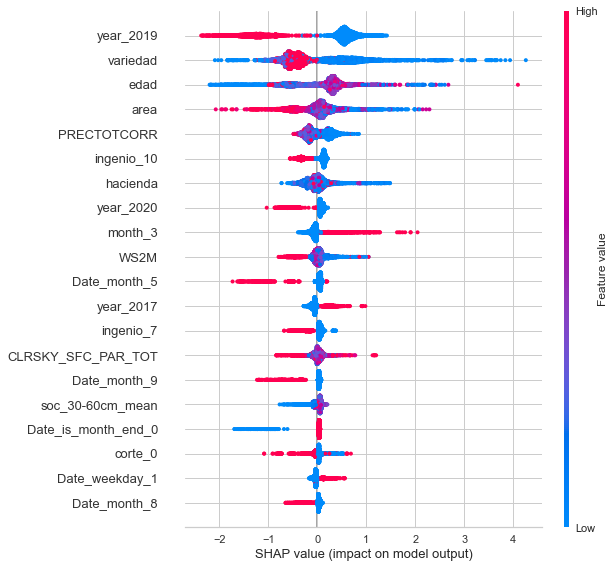

In [26]:
interpret_model(lightgbm)